<a href="https://colab.research.google.com/github/bcaffo/ds4bme_intro/blob/master/lectures/lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to binary classification

The data we're going to be working with for this example is the `oasis` data from Elizabeth Sweeney's R package. The data contain MR (magnetic resonance) images for lesion segmentation in multiple sclerosis (MS). MS is a disorder primarily caused by whtie matter lesions. This dataset is a collection of voxels from an image with radiologists labeling of whether or not a white matter lesion exists at that location. 

In [0]:
! if [ ! -e oasis.csv ]; then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv; fi;

In [2]:
import pandas as pd
dat = pd.read_csv("oasis.csv")
dat.head(4)

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0


Note that we loaded `pandas` first. The various columns are voxel values from different kinds of MR images of the same patient. FLAIR (fluid attenuated inversion recovery), PD (proton density), T1 and T2. The latter two aren't acronyms, but instead named for the specific part of the *relaxation time* of the MR signal. Roughly, the relaxation time is related to the signal produced by protons snapping back into alignment in a strong magnetic field (recall *magnetic* resonance imaging). The `_10` and `_20` ending variables are local averages of the neighboring voxels. We're trying to predict `GOLD_Lesions`, which is the radiologist standard of whether or not there is a lesion at this voxel. (A voxel is a three dimensional pixel.) 

Note here we are doing *voxelwise segmentation* that is trying to predict whether there is a lesion at each specific voxel. This can be viewed as an image processing problem. Other classification problem consider, for example, whether a patient has any lesions (and then where as a followup). Approaching the problem that way is a *image  level* segmentation approach. 

Let's plot it. I'm showing a couple of ways.

GOLD_Lesions
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: FLAIR, dtype: object

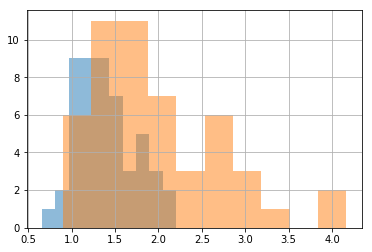

In [3]:
dat.groupby('GOLD_Lesions').FLAIR.hist(alpha= .5)

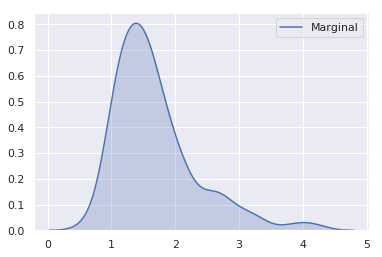

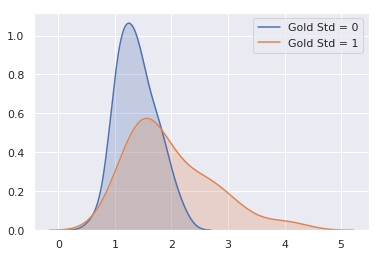

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

x0 = dat.FLAIR[dat.GOLD_Lesions == 0]
x1 = dat.FLAIR[dat.GOLD_Lesions == 1]
x2 = dat.FLAIR


sns.kdeplot(x2, shade = True, label = 'Marginal')

plt.show()

sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')

plt.show()




# Classification

Let's try creating the simplest possible classifier, a threshold. So here we want to pick the value of the threshold so that lower values are classified `GOLD_Lesion == 0` (i.e. no lesion) and higher values are `GOLD_Lesion == 1` (lesion at this voxel). We want to do this on labeled voxels so that we can pick a meaningful threshold on voxels without a gold standard labeling. That is, for new patients we want to automatically label their images one voxel at a time with a simple thresholding rule. We're going to use our **training data** where we know the truth to develop the threshold. 

*Note the idea behind doing this is only useful if the new images without the gold standard are in the same units as the old one, which is not usually the case for MRIs. The technique for trying to make images comparable is called normalization*. 


